In [ ]:
lo import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


# Regresión Lineal Múltiple

La adición  de variables, conduce al análisis de regresión múltiple, en los cuales la variable dependiente (o regresada $Y$) depende de dos o más variables regresoras.

## Modelo de regresión lineal con 3 variables

Se define la función de regresión lineal poblacional como
$$
Y=\beta_0+\beta_1 x_1+\beta_2 x_2+ϵ
$$
en este caso $x_1$ y $x_2$ son las variables regresoras y $\epsilon$ corresponde al  término residual


## **Estimación de parámetros mediante el método de mínimos cuadrados**

La función de regresión muestral (FRM), en este caso de define como
$$
\hat{y}=\hat{\beta}_0+\hat{\beta}_1x_1+\hat{\beta}_2 x_2+\epsilon_i
$$

donde $\epsilon_i$, corresponde al residual.

El método de los mínimos cuadrados, consiste en seleccionar los valores desconocidos de los parámetros $\beta_0,\beta_1$ y $\beta_2$, tal que
$$
y-\left(\beta_0+\beta_1x_1+\beta_2x_2\right))^2
$$
sea lo más pequeña posible.

Considerando la restricción antrior, los valores de las pendientes parciales $\beta_1$ y $\beta_2$, se definen como
$$
\hat{\beta}_1=\frac{\left(\sum y_ix_{1i}\right)\left(\sum x_{2i}^2\right)-\left(\sum y_ix_{2i}\right)\left(\sum x_{2i}x_{1i}\right)}{\left(\sum x_{1i}^2\right)\left(\sum x_{2i}^2\right)-\left(\sum x_{1i}x_{2i}\right)^2}
$$
y
$$
\hat{\beta}_2= \frac{\left(\sum y_ix_{2i}\right)\left(\sum x_{1i}^2\right)-\left(\sum y_ix_{1i}\right)\left(\sum x_{2i}x_{1i}\right)}{\left(\sum x_{1i}^2\right)\left(\sum x_{2i}^2\right)-\left(\sum x_{1i}x_{2i}\right)^2}
$$
de esto, se obtiene que
$$
\hat{\beta}_0=\bar{Y}-\hat{\beta}_1\bar{x}_1-\hat{\beta}_2\bar{x}_2
$$


## Ejemplo:

Apliquemos lo anterior para determinar el modelo de regresión lineal que permita
predecir el rendimiento de un vehículo en función de su acceleración, peso y caballos de fuerza. Base de datos mpg

In [ ]:
autos=sns.load_dataset('mpg')

In [ ]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
autos=autos.dropna()

In [ ]:
En# Variables Regresoras:
X=autos[['acceleration','weight','horsepower']]
y=autos['mpg']

In [ ]:
X=sm.add_constant(X)

In [ ]:
modelo=sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     311.1
Date:                Tue, 20 May 2025   Prob (F-statistic):          7.48e-103
Time:                        23:06:31   Log-Likelihood:                -1121.0
No. Observations:                 392   AIC:                             2250.
Df Residuals:                     388   BIC:                             2266.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           45.6783      2.409     18.965      0.000      40.943      50.414
acceleration    -0.0021      0.123     -0.017      0.987      -0.245       0.240
weight          -0.0058      0.001    -10.024      0.000      -0.007      -0.005
horsepower      -0.0475      0.016     -2.970      0.003      -0.079      -0.016
==============================================================================
Omnibus:                       35.392   Durbin-Watson:                   0.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.071
Skew:                           0.684   Prob(JB):                     9.91e-11
Kurtosis:                       3.975   Cond. No.                     3.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
modelo.params

,0
const,45.678293
acceleration,-0.002066
weight,-0.005789
horsepower,-0.047496


$$
mpg= 45.678293-0.002066 *aceleracion- 0.005789*weight-0.047496*horsepower
$$

2. Determinar el rendimiento del automóvil, si este tiene una aceleración de 13.1 $km/hr$, un peso de 3500 kg y una potencia de 142 caballos de fuerza.

In [ ]:
predicciones=sm.add_constant(pd.DataFrame({'x1':[13.1,0],
              'x2':[3500,0],
              'x3':[142,0]}))

In [ ]:
predicciones

,const,x1,x2,x3
0,1.0,13.1,3500,142
1,1.0,0.0,0,0


In [ ]:
modelo.predict(predicciones)

,0
0,18.643946
1,45.678293


In [ ]:
45.678-0.002066*13.1-0.005789*3500-0.047496*142

18.645003399999997

# Bondad de Ajuste

Hemos supuesto una relación lineal entre la media de la variable de respuesta y las variables regresoras.
Para determinar si el ajuste es razonable, debemos comparar los $y_i$ con los $\hat{y}_i$




## 1. Coeficiente de determinación ($R^2$)

El coeficiente de determinación $R^2$, es una medida que nos dice qué tan bien el modelo de regresión lineal explica la variación en los datos.

 En otras palabras, muestra qué porcentaje de los cambios en la variable regresada o de respuesta $y$ pueden explicarse a partir de las variables regresoras $x_i$ del modelo. Este valor se define como
 $$
 R^2=1-\dfrac{\sum(y_i-\hat{y}_i)^2}{\sum{(y_i-\bar{y})^2}}
 $$

In [ ]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     311.1
Date:                Wed, 14 May 2025   Prob (F-statistic):          7.48e-103
Time:                        01:26:40   Log-Likelihood:                -1121.0
No. Observations:                 392   AIC:                             2250.
Df Residuals:                     388   BIC:                             2266.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           45.6783      2.409     18.965      0.000      40.943      50.414
acceleration    -0.0021      0.123     -0.017      0.987      -0.245       0.240
weight          -0.0058      0.001    -10.024      0.000      -0.007      -0.005
horsepower      -0.0475      0.016     -2.970      0.003      -0.079      -0.016
==============================================================================
Omnibus:                       35.392   Durbin-Watson:                   0.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.071
Skew:                           0.684   Prob(JB):                     9.91e-11
Kurtosis:                       3.975   Cond. No.                     3.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
modelo.rsquared

np.float64(0.7063754859981903)

## 2. Coeficiente de determinación ajustado $\bar{R}^2$

Se define el coeficiente de determinación ajustado $\bar{R}^2 $ como
$$
 \bar{R}^2=1-\dfrac{\sum(y_i-\hat{y}_i)^2/(n-p)}{\sum{(y_i-\bar{y})^2}/(n-1)}
 $$

 donde $p-1$ corresponde al número de variables regresoras del modelo.

**Observación:**

- A diferencia de $R^2$, $\bar{R}^2$, sólo aumentará si al añadir variables adicionales al problema, estás resultan ser significativas al modelo.
- $\bar{R}^2$ puede disminuir si se añaden variables poco significativas para el modelo.


In [ ]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     311.1
Date:                Wed, 14 May 2025   Prob (F-statistic):          7.48e-103
Time:                        01:28:48   Log-Likelihood:                -1121.0
No. Observations:                 392   AIC:                             2250.
Df Residuals:                     388   BIC:                             2266.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           45.6783      2.409     18.965      0.000      40.943      50.414
acceleration    -0.0021      0.123     -0.017      0.987      -0.245       0.240
weight          -0.0058      0.001    -10.024      0.000      -0.007      -0.005
horsepower      -0.0475      0.016     -2.970      0.003      -0.079      -0.016
==============================================================================
Omnibus:                       35.392   Durbin-Watson:                   0.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.071
Skew:                           0.684   Prob(JB):                     9.91e-11
Kurtosis:                       3.975   Cond. No.                     3.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
modelo.rsquared_adj

np.float64(0.7041051933641558)

# Pruebas de Hipótesis sobre coeficientes de Regresión individuales

Estas pruebas son útiles para determinar el valor potencial de cada una de las variables regresoras, en el modelo de regresión.

En este caso, dado un modelo de regresión lineal:
$$
Y=\beta_0+\beta_1x_1+\beta_2x_2+\cdots\beta_kx_k
$$
nos plantereamos como determinar que variables tienen un impacto significativo en el modelo. Para esto, consideraremos
$$
H_0:\beta_j=0\qquad H_1:\beta_j\neq0
$$
Si se acepta $H_0$, entonces la variable regresora $x_j$ no tiene gran relevancia (por si sola) en el modelo.
El estadístico de prueba es:
$$
t=\frac{\hat{\beta}_j-\beta_j}{ee(\hat{\beta}_j)}
$$

**Observación**

Si una variable $x_i$ es significativa, entonces esa variable tiene un efecto real sobre la variable de respuesta $y$.

In [ ]:
autos=sns.load_dataset('mpg')

In [ ]:
# Debemos quitar las entradas nulas, para realizar el ajuste de mínimos cuadrados
autos=autos.dropna()

In [ ]:
autos.columns
# variables regresoras: caballlos de fuerza, peso y la variable aceleración
# mpg= variable regresada

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [ ]:
X=autos[['horsepower','weight','acceleration']]
y=autos['mpg']
X=sm.add_constant(X)

In [ ]:
modelo=sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     311.1
Date:                Fri, 23 May 2025   Prob (F-statistic):          7.48e-103
Time:                        23:19:29   Log-Likelihood:                -1121.0
No. Observations:                 392   AIC:                             2250.
Df Residuals:                     388   BIC:                             2266.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           45.6783      2.409     18.965      0.000      40.943      50.414
horsepower      -0.0475      0.016     -2.970      0.003      -0.079      -0.016
weight          -0.0058      0.001    -10.024      0.000      -0.007      -0.005
acceleration    -0.0021      0.123     -0.017      0.987      -0.245       0.240
==============================================================================
Omnibus:                       35.392   Durbin-Watson:                   0.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.071
Skew:                           0.684   Prob(JB):                     9.91e-11
Kurtosis:                       3.975   Cond. No.                     3.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Estudiaremos el real impacto de cada variable regresora en el rendimiento de los autómoviles**

In [ ]:
p_valor=modelo.pvalues.iloc[1:] # p_valor asociado a cada una de las variables regresoras
p_valor

,0
horsepower,3.158152e-03
weight,3.500486e-21
acceleration,9.866463e-01


**Prueba de hipótesis sobre la significancia de la variable horsepower**
$$
H_0: \mathrm{horsepower\,no\,es\,significativa}\qquad H_1: \mathrm{horsepower\,si\,es\,significativa}
$$

In [ ]:
p_valorH=p_valor.iloc[0]

In [ ]:
# Prueba de hipótesis
significancia=0.05
if p_valorH>=significancia:
  print('La variable horsepower no tiene un impacto en la variable mpg')
else:
  print('La variable horsepower si tiene un impacto en la variable mpg')

La variable horsepower si tiene un impacto en la variable mpg


**También podemos estudiar la significancia de cada variable, con un ciclo for**

In [ ]:
# Veamos cual variable es significativa para el problema
i=[]
for i,elemento in enumerate(p_valor.index):
  if p_valor.iloc[i]>=significancia:
    print(f' x{i+1} no es significativa para el problema') #aceptar H_0
  else:
    print(f'x{i+1} es significativa para el problema') #aceptar H_1


x1 es significativa para el problema
x2 es significativa para el problema
 x3 no es significativa para el problema


Ajustaremos un modelo de regresión lineal, sin la variable **acceleration**

In [ ]:
X1=sm.add_constant(autos[['horsepower','weight']])

In [ ]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     311.1
Date:                Fri, 23 May 2025   Prob (F-statistic):          7.48e-103
Time:                        23:35:36   Log-Likelihood:                -1121.0
No. Observations:                 392   AIC:                             2250.
Df Residuals:                     388   BIC:                             2266.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           45.6783      2.409     18.965      0.000      40.943      50.414
horsepower      -0.0475      0.016     -2.970      0.003      -0.079      -0.016
weight          -0.0058      0.001    -10.024      0.000      -0.007      -0.005
acceleration    -0.0021      0.123     -0.017      0.987      -0.245       0.240
==============================================================================
Omnibus:                       35.392   Durbin-Watson:                   0.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.071
Skew:                           0.684   Prob(JB):                     9.91e-11
Kurtosis:                       3.975   Cond. No.                     3.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
modelo1=sm.OLS(y,X1).fit()
modelo1.summary()
# Notar que al considerar un modelo de regresión sólo con las variables significativas el coeficiente de determinación
#Ajustado aumenta.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     467.9
Date:                Fri, 23 May 2025   Prob (F-statistic):          3.06e-104
Time:                        23:34:49   Log-Likelihood:                -1121.0
No. Observations:                 392   AIC:                             2248.
Df Residuals:                     389   BIC:                             2260.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.6402      0.793     57.540      0.000      44.081      47.200
horsepower    -0.0473      0.011     -4.267      0.000      -0.069      -0.026
weight        -0.0058      0.001    -11.535      0.000      -0.007      -0.005
==============================================================================
Omnibus:                       35.336   Durbin-Watson:                   0.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.973
Skew:                           0.683   Prob(JB):                     1.04e-10
Kurtosis:                       3.974   Cond. No.                     1.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Multicolinealidad

En los problemas de regresión múltiple, se espera encontrar dependencias entre la variable de respuesta $y$  y las variables regresoras $x_j$. Sin embargo, en la mayoría de los problemas de regresión se encuentra que también hay dependencia entre las variables regresoras $x_j$. Cuando estas dependencias son fuertes, se dice que existe **multicolinealidad**.

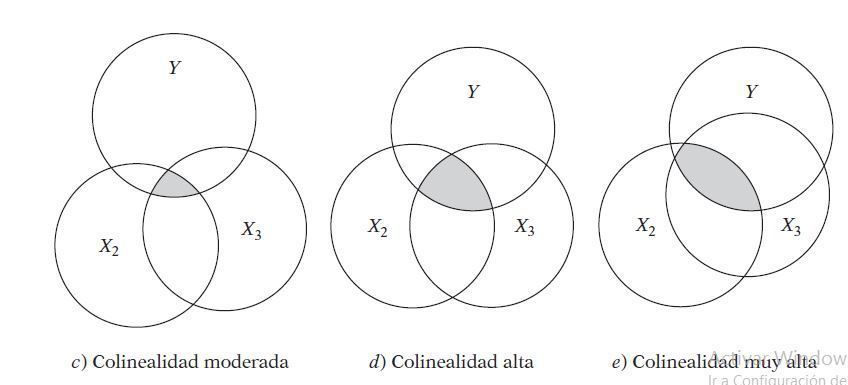

## Causas de la multicolinealidad


1. El método de recolección de información. Por ejemplo, la obtención de muestras en un intervalo limitado de valores tomados por las regresoras en la población.

2. Restricciones en el modelo o en la población objeto de muestreo. Por ejemplo, al considerar la regresión del consumo de electricidad sobre el ingreso $X_2$ y el tamaño de las viviendas $X_3$ hay una restricción física en la población, pues las familias con ingresos más altos suelen habitar viviendas más grandes que las familias con ingresos más bajos.


3. Un modelo sobredeterminado. Esto sucede cuando el modelo tiene más variables regresoras que el número de observaciones. Esto puede suceder en investigación médica, donde en ocasiones hay un número reducido de pacientes sobre quienes se reúne información respecto de
un gran número de variables.






## Consecuencias de la multicolinealidad


- Los coeficientes de regresión $\beta_i$ tendrán errores estándar altos, por lo tanto las pruebas $t$ no serán significativas.

- Los valores de los coeficientes de regresión $\beta_i$ son inestables (cambian rápidamente con pequeñas modificaciones en los datos) volviéndose imposible determinar el impacto individual de cada variable regresora $x_i$ sobre el modelo.


In [ ]:
# Cuando existe un problema de multicolinealidad entre las variables regresoras, entonces las pruebas de significancia
# sobre la importancia de cada variable en el modelo, presentará errores

## Prueba de multicolinealidad

###  Prueba del factor inflacionario de la varianza (**VIF**)

Consideraremos el modelo de regresión lineal con $k$ variables
$$
Y=\beta_0+\beta_1x_1+\beta_2x_2+\cdots\beta_kx_k+\epsilon
$$

Se define el factor inflacionario de la varianza $\mathrm{VIF}_j$  para cada variable regresora $X_j$ como
$$
\mathrm{VIF}_j=\frac{1}{1-R_j^2}
$$
donde

- $R_j^2$ es el coeficiente de determinación de la ecuación de regresión auxiliar

$$
X_j=\alpha_0+\alpha_1x_1+\alpha_2x_2+\cdots \alpha_{j-1}x_{j-1}
$$
donde $X_j$ es la variable regresada y el resto de las variables independientes, actuarán como las variables regresoras.

Así, para utilizar este método:

 Se calcula el $\mathrm{VIF}$ para cada una de las variables regresoras. Luego, se procederá a interpretar los resultados de la siguiente manera:


1. Si $\mathrm{VIF}=1$, no existe un problema de multicolineadidad en el modelo.
2. Si $1<\mathrm{VIF}\leq 5$, en este caso la multicolinealidad se considera aceptable (debido a que es baja o moderada).
3. $\mathrm{VIF} > 5$ Existe una alta multicolinealidad. Considera la posibilidad de tomar medidas para reducir la multicolinealidad, como eliminar o combinar las variables regresoras correlacionados.
4. Si $\mathrm{VIF}>10$, existe alta multicolinealidad por ende, se recomienda tomar medidas, como eliminar variables regresoras fuertemente correlacionadas.

**Ejemplo:**

Veamos un ejemplo utilizando un conjunto de datos que contiene información sobre 500 personas, incluida su altura, peso, sexo e índice de masa corporal (IMC). En este caso, la variable dependiente es IMC y las demás variables corresponden a las variables regresoras del modelo. Nuestro objetivo es comprobar la multicolinealidad entre estas características utilizando VIF

Considerar la base de datos BMI.csv

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving BMI.csv to BMI.csv


In [ ]:
peso=pd.read_csv('BMI.csv')
peso.columns


Index(['Gender', 'Height', 'Weight', 'Index'], dtype='object')

**Queremos determinar si existe correlación entre las variables regresoras del problema**

In [ ]:
# Variable sexo: de categórica a númerica
peso['Gender']=peso['Gender'].map({'Female':1,
                                   'Male':0})
# Asignamos la variable numérica 1 al sexo mujer
# y la variable numérica 0 al sexo hombre

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Seleccionamos las variables regresoras
X=sm.add_constant(peso[['Gender','Height','Weight']])

In [ ]:
# Calcular el VIF a cada variable regresora
vif=pd.DataFrame()
vif['variables']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]

In [ ]:
print(f'{vif}')

  variables         VIF
0     const  120.380013
1    Gender    1.000403
2    Height    1.000313
3    Weight    1.000091


## ¿ Qué hacer si VIF es alto?

- Uno de los enfoques más sencillos para tratar la multicolinealidad es eliminar una o más de las variables altamente correlacionadas del conjunto de datos (eliminar la variables que es menos importante para el análisis o que tiene un valor de VIF más alto).

  Sin embargo, al eliminar una variable se puede incurrir en un sesgo de especificación ( se omiten variables relevantes, o se incluyen variables irrelevantes), lo cual induce a resultados erróneos.

- Combinar las variables correlacionadas, creando una nueva variable que represente la combinación entre las variables altamente correlacionada.

- De ser posible, aumentar el tamaño de la muestra
- Transformar una variable.

**Ejercicio:**

Un equipo de investigación desea predecir el consumo energético mensual de un hogar (en kWh) en función de diversas características relacionadas con el tamaño y el uso de los electrodomésticos en el hogar.

Las variables consideradas en esta investigación son las siguientes:

- Cantidad de televisores: Número de televisores en el hogar
- Cantidad de computadoras: Número de computadoras en el hogar
- Cantidad de dispositivos electrónicos
- Horas de uso promedio de dispositivos electrónicos: promedio de horas diarias que los dispositivos están encendidos.
- Tamaño del hogar (en $m^2$)

Consideraremos la base de datos 'consumo.csv'

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving consumo.csv to consumo.csv


In [ ]:
consumo=pd.read_csv('consumo.csv',sep=';',decimal=',').round(2)
consumo.columns

Index(['Unnamed: 0', 'Cantidad de televisores', 'Cantidad de computadores',
       'Cantidad de dispositivos electrónicos', 'Horas de uso promedio',
       'Tamaño del hogar', 'Consumo de Energía'],
      dtype='object')

1. Aplicar un modelo de regresión lineal múltiple con las variables indicadas

In [ ]:
y=consumo['Consumo de Energía']
X2=sm.add_constant(consumo[['Cantidad de televisores','Cantidad de computadores',
       'Cantidad de dispositivos electrónicos', 'Horas de uso promedio',
       'Tamaño del hogar']])

In [ ]:
modelo2=sm.OLS(y,X2).fit()
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Consumo de Energía   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.569e+05
Date:                Sat, 24 May 2025   Prob (F-statistic):               0.00
Time:                        00:16:14   Log-Likelihood:                -2707.6
No. Observations:                 893   AIC:                             5423.
Df Residuals:                     889   BIC:                             5442.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     1.5191      0.523      2.907      0.004       0.493       2.545
Cantidad de televisores                   1.4979      0.230      6.510      0.000       1.046       1.949
Cantidad de computadores                  1.8017      0.231      7.809      0.000       1.349       2.254
Cantidad de dispositivos electrónicos     4.8187      0.106     45.247      0.000       4.610       5.028
Horas de uso promedio                     3.5176      0.078     45.247      0.000       3.365       3.670
Tamaño del hogar                          6.1011      0.007    872.930      0.000       6.087       6.115
==============================================================================
Omnibus:                        1.600   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.449   Jarque-Bera (JB):                1.677
Skew:                           0.094   Prob(JB):                        0.432
Kurtosis:                       2.901   Cond. No.                     4.96e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.02e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

2. ¿ Se podría afirmar que existe un problema de multicolinealidad  entre las variables del problema? Justifique adecuadamente.

In [ ]:
vif=pd.DataFrame()
vif['variables']=X2.columns
vif['VIF']=[variance_inflation_factor(X2.values,i) for i in range(len(X2.columns))]

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [ ]:
print(f'{vif}')

                               variables       VIF
0                                  const  0.000000
1                Cantidad de televisores       inf
2               Cantidad de computadores       inf
3  Cantidad de dispositivos electrónicos       inf
4                  Horas de uso promedio       inf
5                       Tamaño del hogar  1.006456


3. Aplicar alguna técnica para reducir la colinealidad entre las variables regresoras(justificando adecuadamente). Luego comparar y comentar los resultados con el modelo inicia

In [ ]:
# Función que nos permita eliminar las variables con un VIF alto

In [ ]:
X3=sm.add_constant(consumo[['Cantidad de televisores','Cantidad de computadores',
       'Tamaño del hogar']])

In [ ]:
vif=pd.DataFrame()
vif['variables']=X3.columns
vif['VIF']=[variance_inflation_factor(X3.values,i) for i in range(len(X3.columns))]

In [ ]:
print(f'{vif}')

                  variables        VIF
0                     const  16.299728
1   Cantidad de televisores   1.007273
2  Cantidad de computadores   1.002605
3          Tamaño del hogar   1.006456
